# XOR Problem

In [1]:
import numpy as np
import sklearn.neural_network
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

criterio_convergencia = 0.3

x = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([-1, 1, 1, -1])


c:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
LRS = [0.05, 0.25, 0.5, 1, 2]
momentos = [0, 0.5, 1]
shuffles = [True, False]
matrixs = []
c = 1

for mom in momentos:
    matrix = []
    for lr in LRS:
        print("({0}/15) - Momento: {1} learning rate: {2}".format(c, mom, lr))
        c+=1
        indexs = []
        for n in range(10):
            model = MLPClassifier(activation='tanh',  #relu logistic tanh identity
                                    solver='sgd',
                                    max_iter=30000, 
                                    hidden_layer_sizes=(2,),
                                    learning_rate_init=lr,
                                    shuffle=False,
                                    momentum=mom,
                                    tol=0.0000001,
                                    n_iter_no_change=800).fit(x, y)
            
            boolean = True
            for index in range(len(model.loss_curve_)):
                if model.loss_curve_[index] <= criterio_convergencia:
                    indexs.append(index+1)
                    boolean = False
                    break
            if boolean:
                indexs.append("nan")
        matrix.append(indexs)
    matrixs.append(np.array(matrix).transpose())    

(1/15) - Momento: 0 learning rate: 0.05
(2/15) - Momento: 0 learning rate: 0.25
(3/15) - Momento: 0 learning rate: 0.5
(4/15) - Momento: 0 learning rate: 1
(5/15) - Momento: 0 learning rate: 2
(6/15) - Momento: 0.5 learning rate: 0.05
(7/15) - Momento: 0.5 learning rate: 0.25
(8/15) - Momento: 0.5 learning rate: 0.5
(9/15) - Momento: 0.5 learning rate: 1
(10/15) - Momento: 0.5 learning rate: 2
(11/15) - Momento: 1 learning rate: 0.05
(12/15) - Momento: 1 learning rate: 0.25
(13/15) - Momento: 1 learning rate: 0.5
(14/15) - Momento: 1 learning rate: 1
(15/15) - Momento: 1 learning rate: 2


In [3]:
print("momento 0")
df = pd.DataFrame(matrixs[0], columns=LRS)
df.index = np.arange(1, len(df) + 1)
df.to_csv("exercicio1.csv")
df

momento 0


,0.05,0.25,0.50,1.00,2.00
1,206,nan,nan,371,19
2,nan,nan,46,43,nan
3,256,nan,nan,18,9
4,367,97,nan,17,11
5,294,nan,60,27,nan
6,nan,nan,nan,nan,11
7,nan,159,nan,29,nan
8,nan,nan,nan,nan,nan
9,453,63,nan,26,23
10,nan,nan,24,nan,nan


# Efeito da introdução de um termo de momento

In [4]:
print("momento 0.5")
df = pd.DataFrame(matrixs[1], columns=LRS)
df.index = np.arange(1, len(df) + 1)
df.to_csv("exercicio1_momento.csv")
df

momento 0.5


,0.05,0.25,0.50,1.00,2.00
1,143,nan,nan,21,nan
2,nan,nan,nan,15,14
3,151,nan,nan,21,nan
4,nan,48,nan,20,nan
5,nan,27,nan,17,nan
6,118,23,29,nan,nan
7,nan,51,nan,17,nan
8,nan,nan,22,19,nan
9,nan,nan,26,nan,8
10,nan,42,35,nan,nan


In [5]:
print("momento 1")
df = pd.DataFrame(matrixs[2], columns=LRS)
df.index = np.arange(1, len(df) + 1)
df.to_csv("exercicio1_momento1.csv")
df

momento 1


,0.05,0.25,0.50,1.00,2.00
1,nan,nan,nan,7,788
2,nan,nan,nan,nan,9
3,44,nan,nan,nan,nan
4,nan,36,nan,nan,nan
5,25,nan,14,9,807
6,nan,36,nan,nan,5
7,25,nan,nan,nan,729
8,nan,nan,12,nan,nan
9,53,nan,nan,nan,12
10,nan,nan,nan,nan,14


## Perceber os melhores parametros

In [6]:
x, y

(array([[-1, -1],
        [-1,  1],
        [ 1, -1],
        [ 1,  1]]), array([-1,  1,  1, -1]))

In [7]:
LRS = [0.05, 0.25, 0.5, 1, 2]
momentos = [0, 0.5, 1]
shuffles = [True, False]

mlp = MLPClassifier(activation =  "tanh",
                    solver = 'sgd',
                    max_iter = 30000,
                    shuffle=False,
                    tol = 0.000001,
                    n_iter_no_change = 500).fit(x, y)

mlp_params = {
    'hidden_layer_sizes':[(2, ), (4, 2, 1)],
    'learning_rate_init': [0.05, 0.25, 0.5, 1, 2],
    "momentum" : [0, 0.5, 1]
}
mlp_cv = GridSearchCV(mlp, mlp_params, cv = 2, verbose = 1).fit(x, y)

# optimum params
print(mlp_cv.best_params_)
print(mlp_cv.best_score_)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
{'hidden_layer_sizes': (4, 2, 1), 'learning_rate_init': 0.25, 'momentum': 1}
0.5


In [8]:
best = pd.DataFrame(mlp_cv.cv_results_).sort_values(by='rank_test_score')
best = dict(best['params'][0:10])
best

{29: {'hidden_layer_sizes': (4, 2, 1), 'learning_rate_init': 2, 'momentum': 1},
 26: {'hidden_layer_sizes': (4, 2, 1), 'learning_rate_init': 1, 'momentum': 1},
 23: {'hidden_layer_sizes': (4, 2, 1),
  'learning_rate_init': 0.5,
  'momentum': 1},
 20: {'hidden_layer_sizes': (4, 2, 1),
  'learning_rate_init': 0.25,
  'momentum': 1},
 19: {'hidden_layer_sizes': (4, 2, 1),
  'learning_rate_init': 0.25,
  'momentum': 0.5},
 18: {'hidden_layer_sizes': (4, 2, 1),
  'learning_rate_init': 0.25,
  'momentum': 0},
 17: {'hidden_layer_sizes': (4, 2, 1),
  'learning_rate_init': 0.05,
  'momentum': 1},
 16: {'hidden_layer_sizes': (4, 2, 1),
  'learning_rate_init': 0.05,
  'momentum': 0.5},
 14: {'hidden_layer_sizes': (2,), 'learning_rate_init': 2, 'momentum': 1},
 8: {'hidden_layer_sizes': (2,), 'learning_rate_init': 0.5, 'momentum': 1}}

## Testar outros parametros

In [9]:
LRS = [0.05, 0.25, 0.5, 1, 2]
momentos = [0, 0.5, 1]
shuffles = [True, False]
matrixs = []
c = 1

for mom in momentos:
    matrix = []
    for lr in LRS:
        print("({0}/15) - Momento: {1} learning rate: {2}".format(c, mom, lr))
        c+=1
        indexs = []
        for n in range(10):
            model = MLPClassifier(activation='tanh',  #relu logistic tanh identity
                                 solver='sgd',
                                 max_iter=30000, 
                                 hidden_layer_sizes=(4, 2, 1),
                                 learning_rate_init=lr,
                                 shuffle=False,
                                 momentum=mom,
                                 tol=0.0000001,
                                 n_iter_no_change=800).fit(x, y)
            
            boolean = True
            for index in range(len(model.loss_curve_)):
                if model.loss_curve_[index] <= criterio_convergencia:
                    indexs.append(index+1)
                    boolean = False
                    break
            if boolean:
                indexs.append("nan")
        matrix.append(indexs)
    matrixs.append(np.array(matrix).transpose())

(1/15) - Momento: 0 learning rate: 0.05
(2/15) - Momento: 0 learning rate: 0.25
(3/15) - Momento: 0 learning rate: 0.5
(4/15) - Momento: 0 learning rate: 1
(5/15) - Momento: 0 learning rate: 2
(6/15) - Momento: 0.5 learning rate: 0.05
(7/15) - Momento: 0.5 learning rate: 0.25
(8/15) - Momento: 0.5 learning rate: 0.5
(9/15) - Momento: 0.5 learning rate: 1
(10/15) - Momento: 0.5 learning rate: 2
(11/15) - Momento: 1 learning rate: 0.05
(12/15) - Momento: 1 learning rate: 0.25
(13/15) - Momento: 1 learning rate: 0.5
(14/15) - Momento: 1 learning rate: 1
(15/15) - Momento: 1 learning rate: 2


In [10]:
print("momento 0")
df = pd.DataFrame(matrixs[0], columns=LRS)
df.index = np.arange(1, len(df) + 1)
df

momento 0


,0.05,0.25,0.50,1.00,2.00
1,nan,nan,19,1993,16
2,nan,348,nan,22,136
3,nan,nan,234,18,13
4,489,nan,nan,nan,nan
5,nan,1099,76,nan,nan
6,nan,198,324,nan,nan
7,162,166,66,196,213
8,133,48,nan,36,423
9,nan,47,nan,63,nan
10,183,227,10,905,24


In [11]:
print("momento 0.5")
df = pd.DataFrame(matrixs[1], columns=LRS)
df.index = np.arange(1, len(df) + 1)
df

momento 0.5


,0.05,0.25,0.50,1.00,2.00
1,nan,51,86,nan,nan
2,2434,124,528,12,nan
3,705,29,58,41,40
4,nan,104,19,nan,184
5,2439,469,39,14,nan
6,nan,nan,594,23,nan
7,84,15,nan,nan,47
8,nan,1017,nan,9,22
9,104,59,nan,26,16
10,nan,nan,17,334,nan


In [12]:
print("momento 1")
df = pd.DataFrame(matrixs[2], columns=LRS)
df.index = np.arange(1, len(df) + 1)
df

momento 1


,0.05,0.25,0.50,1.00,2.00
1,nan,nan,nan,nan,nan
2,nan,nan,nan,14,5
3,nan,14,nan,nan,8
4,nan,nan,6,nan,nan
5,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan
7,18,nan,nan,nan,nan
8,nan,nan,nan,nan,nan
9,nan,nan,nan,nan,nan
10,nan,18,nan,nan,nan


# Ordem de apresentação aleatória

In [13]:
LRS = [0.05, 0.25, 0.5, 1, 2]
c = 1
matrix = []
for lr in LRS:
    print("({0}/5) - Momento: {1} learning rate: {2}".format(c, mom, lr))
    c+=1
    indexs = []
    for n in range(10):
        model = MLPClassifier(activation='tanh',  #relu logistic tanh identity
                             solver='sgd',
                             max_iter=30000, 
                             hidden_layer_sizes=(2,),
                             learning_rate_init=lr,
                             shuffle=True,
                             momentum=mom,
                             tol=0.0000001,
                             n_iter_no_change=800).fit(x, y)

        boolean = True
        for index in range(len(model.loss_curve_)):
            if model.loss_curve_[index] <= criterio_convergencia:
                indexs.append(index+1)
                boolean = False
                break
        if boolean:
            indexs.append("nan")
    matrix.append(indexs)

(1/5) - Momento: 1 learning rate: 0.05
(2/5) - Momento: 1 learning rate: 0.25
(3/5) - Momento: 1 learning rate: 0.5
(4/5) - Momento: 1 learning rate: 1
(5/5) - Momento: 1 learning rate: 2


In [13]:
print("Ordem de apresentação aleatória")
df = pd.DataFrame(np.array(matrix).transpose(), columns=LRS)
df.index = np.arange(1, len(df) + 1)
df

Ordem de apresentação aleatória


,0.05,0.25,0.50,1.00,2.00
1,nan,nan,nan,nan,nan
2,nan,nan,nan,14,5
3,nan,14,nan,nan,8
4,nan,nan,6,nan,nan
5,nan,nan,nan,nan,nan
6,nan,nan,nan,nan,nan
7,18,nan,nan,nan,nan
8,nan,nan,nan,nan,nan
9,nan,nan,nan,nan,nan
10,nan,18,nan,nan,nan


In [15]:
LRS = [0.05, 0.25, 0.5, 1, 2]
c = 1
matrix = []
for lr in LRS:
    print("({0}/5) - Momento: {1} learning rate: {2}".format(c, mom, lr))
    c+=1
    indexs = []
    for n in range(10):
        model = MLPClassifier(activation='tanh',  #relu logistic tanh identity
                                solver='sgd',
                                max_iter=30000, 
                                hidden_layer_sizes=(4, 2),
                                learning_rate_init=lr,
                                shuffle=True,
                                momentum=mom,
                                tol=0.0000001,
                                n_iter_no_change=800).fit(x, y)

        boolean = True
        for index in range(len(model.loss_curve_)):
            if model.loss_curve_[index] <= criterio_convergencia:
                indexs.append(index+1)
                boolean = False
                break
        if boolean:
            indexs.append("nan")
    matrix.append(indexs)

(1/5) - Momento: 1 learning rate: 0.05
(2/5) - Momento: 1 learning rate: 0.25
(3/5) - Momento: 1 learning rate: 0.5
(4/5) - Momento: 1 learning rate: 1
(5/5) - Momento: 1 learning rate: 2


In [16]:
print("Ordem de apresentação aleatória")
df = pd.DataFrame(np.array(matrix).transpose(), columns=LRS)
df.index = np.arange(1, len(df) + 1)
df

Ordem de apresentação aleatória


,0.05,0.25,0.50,1.00,2.00
1,nan,11,nan,nan,8
2,22,18,43,7,nan
3,40,39,nan,7,32
4,nan,32,7,7,nan
5,18,11,9,nan,9
6,27,nan,12,nan,10
7,28,8,13,10,nan
8,nan,nan,nan,26,nan
9,25,24,17,10,nan
10,33,20,6,7,5


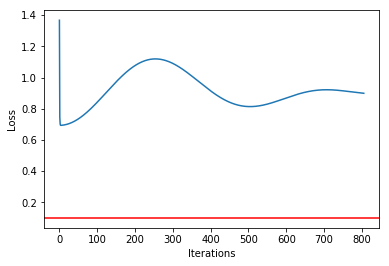

In [14]:
# plot do ultimo modelo com 2 de taxa de aprendizagem
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.axhline(y=0.1, color='r', linestyle='-')
plt.plot(model.loss_curve_)
plt.show()

# Efeito de utilização de uma codificação binária ou bipolar

In [20]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# x = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y = np.array([[-1, 1], [1, -1], [1, -1], [-1, 1]])


In [23]:
LRS = [0.05, 0.25, 0.5, 1, 2]
c = 1
matrix = []
for lr in LRS:
    print("({0}/5) - Momento: {1} learning rate: {2}".format(c, mom, lr))
    c+=1
    indexs = []
    for n in range(10):
        model = MLPClassifier(activation='logistic',  #relu logistic tanh identity
                                solver='sgd',
                                max_iter=30000, 
                                hidden_layer_sizes=(4, 2),
                                learning_rate_init=lr,
                                shuffle=True,
                                momentum=mom,
                                tol=0.0000001,
                                n_iter_no_change=800).fit(x, y)

        boolean = True
        for index in range(len(model.loss_curve_)):
            if model.loss_curve_[index] <= criterio_convergencia:
                indexs.append(index+1)
                boolean = False
                break
        if boolean:
            indexs.append("nan")
    matrix.append(indexs)

(1/5) - Momento: 1 learning rate: 0.05
(2/5) - Momento: 1 learning rate: 0.25
(3/5) - Momento: 1 learning rate: 0.5
(4/5) - Momento: 1 learning rate: 1
(5/5) - Momento: 1 learning rate: 2


In [24]:
print("Efeito de utilização de uma codificação binária ou bipolar;")
df = pd.DataFrame(np.array(matrix).transpose(), columns=LRS)
df.index = np.arange(1, len(df) + 1)
df.to_csv("exercicio1_bipolar.csv")
df

Efeito de utilização de uma codificação binária ou bipolar;


,0.05,0.25,0.50,1.00,2.00
1,11,5,4,3,2
2,10,5,4,3,2
3,12,5,4,3,2
4,12,5,4,3,2
5,9,6,4,3,2
6,11,5,4,3,2
7,11,5,3,3,2
8,11,5,4,3,2
9,10,5,4,3,2
10,11,5,4,3,2


In [21]:
LRS = [0.05, 0.25, 0.5, 1, 2]
c = 1
matrix = []
for lr in LRS:
    print("({0}/5) - Momento: {1} learning rate: {2}".format(c, mom, lr))
    c+=1
    indexs = []
    for n in range(10):
        model = MLPClassifier(activation='tanh',  #relu logistic tanh identity
                             solver='sgd',
                             max_iter=30000, 
                             hidden_layer_sizes=(4, 2),
                             learning_rate_init=lr,
                             shuffle=True,
                             momentum=mom,
                             tol=0.0000001,
                             n_iter_no_change=800).fit(x, y)

        boolean = True
        for index in range(len(model.loss_curve_)):
            if model.loss_curve_[index] <= criterio_convergencia:
                indexs.append(index+1)
                boolean = False
                break
        if boolean:
            indexs.append("nan")
    matrix.append(indexs)

(1/5) - Momento: 1 learning rate: 0.05
(2/5) - Momento: 1 learning rate: 0.25
(3/5) - Momento: 1 learning rate: 0.5
(4/5) - Momento: 1 learning rate: 1


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


(5/5) - Momento: 1 learning rate: 2


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [22]:
print("Efeito de utilização de uma codificação binária ou bipolar;")
df = pd.DataFrame(np.array(matrix).transpose(), columns=LRS)
df.index = np.arange(1, len(df) + 1)
df

Efeito de utilização de uma codificação binária ou bipolar;


,0.05,0.25,0.50,1.00,2.00
1,7,5,4,2,2
2,9,4,4,3,2
3,9,6,4,2,2
4,5,4,3,2,3
5,9,5,4,2,2
6,10,4,3,3,2
7,9,5,3,3,2
8,6,4,3,3,2
9,8,4,3,2,2
10,10,5,3,3,3
